# line plot

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

data = pd.read_csv("data/LoadTimeSeriesData_case1.csv", parse_dates=['timestamp'])
# write your code here:
data['dayofweek'] = data['timestamp'].dt.day_of_week
# Extract the hour of the day from the datetime column
data['hour'] = data['timestamp'].dt.hour
data['date'] = data['timestamp'].dt.date

data.head()

,timestamp,power,dayofweek,hour,date
0,2017-01-01 00:00:00,502.706,6,0,2017-01-01
1,2017-01-01 01:00:00,517.039,6,1,2017-01-01
2,2017-01-01 02:00:00,535.810,6,2,2017-01-01
3,2017-01-01 03:00:00,494.515,6,3,2017-01-01
4,2017-01-01 04:00:00,503.047,6,4,2017-01-01


### Introduction to Load Profile visualization for energy-related time series data

Load profile visualization is a critical tool for analyzing and understanding energy-related time series data, such as electricity demand, renewable energy production, and energy consumption patterns. Load profiles display how energy usage varies over time, typically in hourly or sub-hourly intervals, and can provide valuable insights into energy usage patterns, peak demand periods, and opportunities for energy conservation.

Load profile visualization typically involves plotting energy usage data on a graph, with time on the x-axis and energy usage on the y-axis. The resulting graph shows how energy usage changes over time, with peaks indicating periods of high demand and valleys indicating periods of low demand. Load profiles can be used to identify trends and patterns in energy usage, such as daily or weekly cycles, seasonal fluctuations, and changes in energy consumption due to external factors, such as weather events or economic conditions.

Load profiles are a critical tool for energy utilities, businesses, and policymakers to manage energy usage effectively, optimize energy efficiency, and plan for future energy needs. They can be used to identify opportunities for energy conservation, demand response programs, and energy storage solutions, as well as inform decision-making around energy infrastructure investment and development.

In [8]:
# creating a new DataFrame with the average power for each hour of the day and for each day of the week
data_mean = data.groupby(['dayofweek', 'hour'])['power'].mean().reset_index()

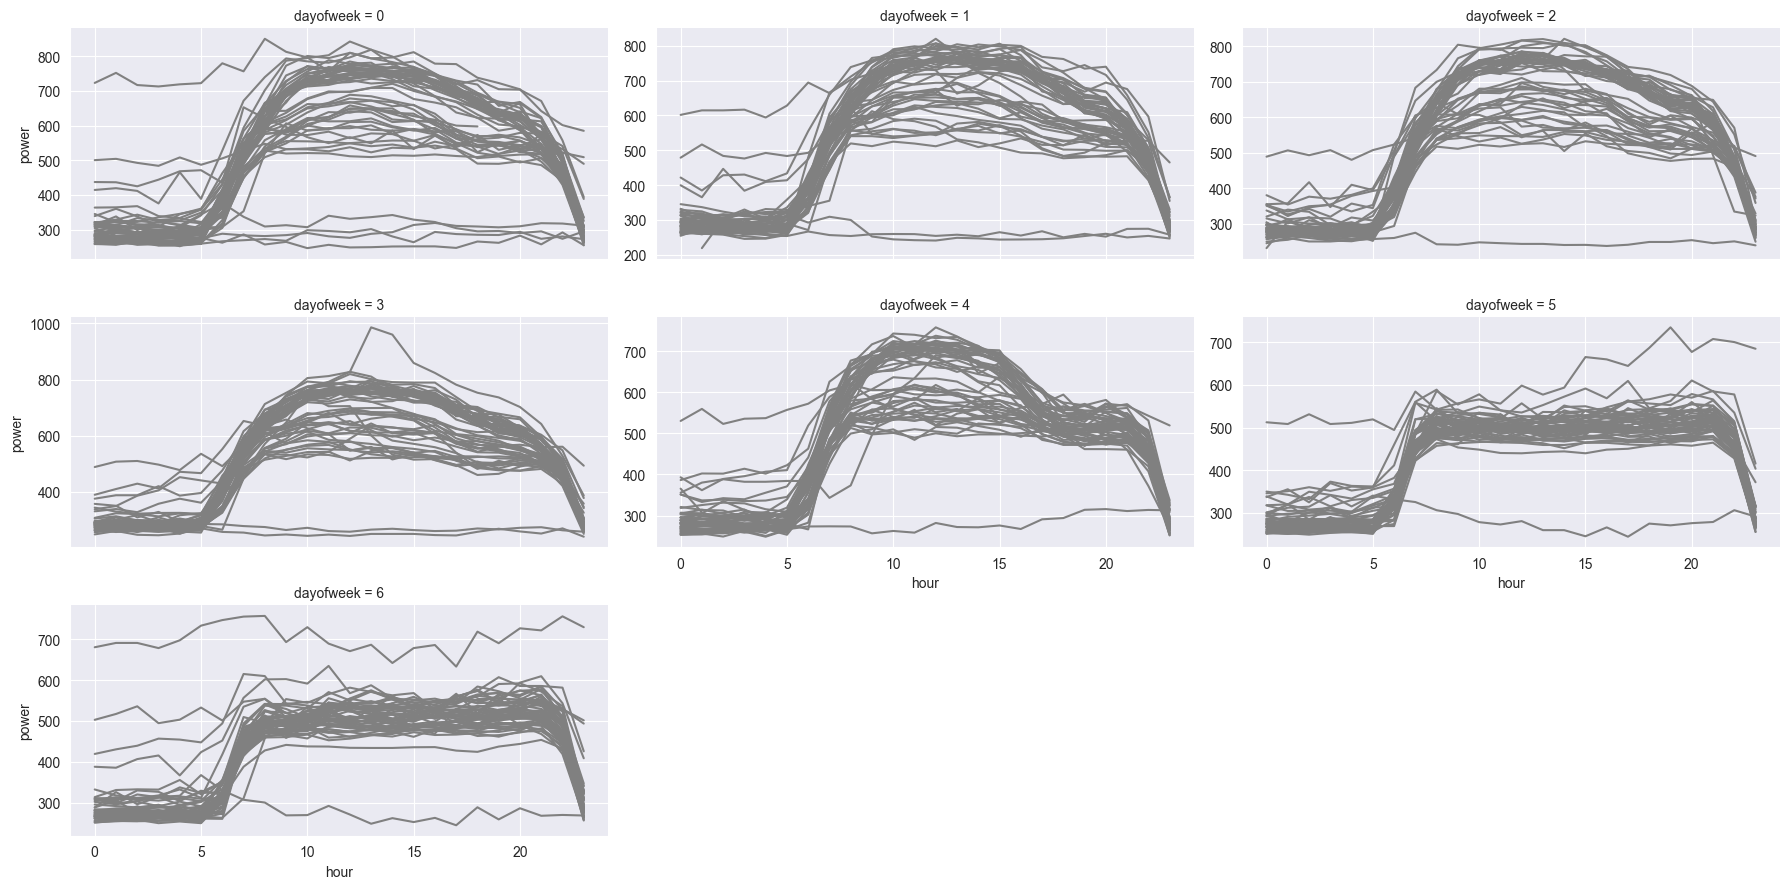

In [9]:
# generating load profiles
g = sns.FacetGrid(data=data, col='dayofweek', hue='date', col_wrap=3, height=3, aspect=2, sharey=False)
g.map(sns.lineplot, 'hour', 'power', color='gray')

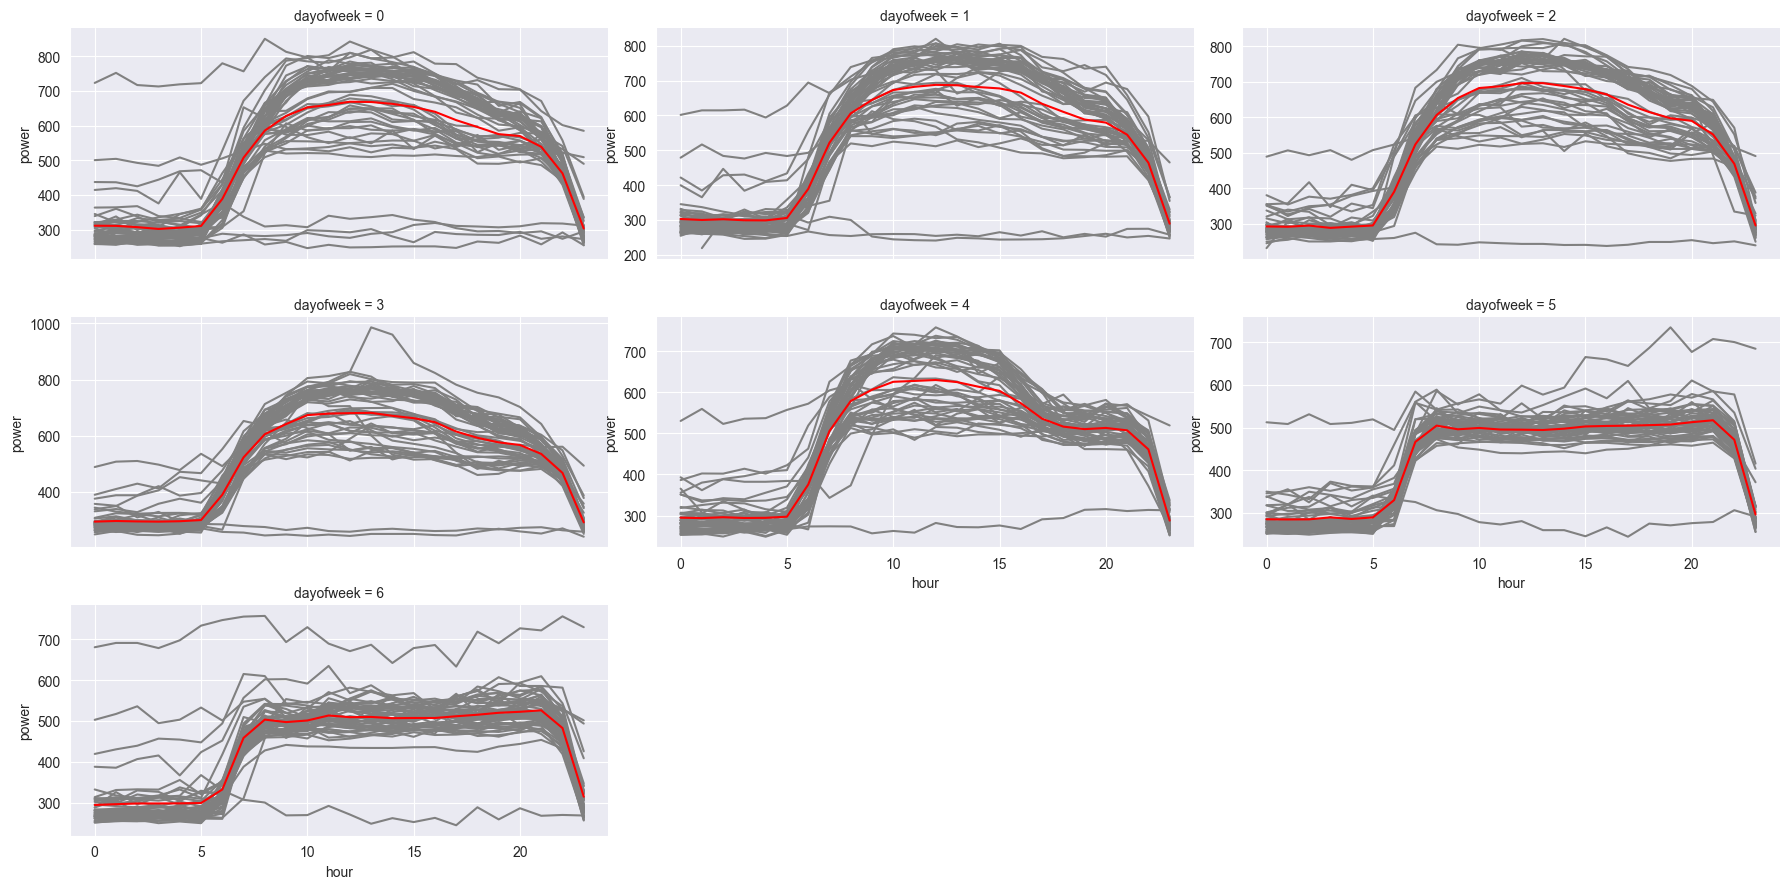

In [10]:
# generating load profiles
g = sns.FacetGrid(data=data, col='dayofweek', hue='date', col_wrap=3, height=3, aspect=2, sharey=False)
g.map(sns.lineplot, 'hour', 'power', color='gray')

# adding average values
for ax, day in zip(g.axes.flatten(), data_mean['dayofweek'].unique()):
    sns.lineplot(x='hour', y='power', data=data_mean[data_mean['dayofweek'] == day], color='r', ax=ax,
                 label='Profilo medio', legend=False)

plt.show()